In [6]:
import pandas as pd
import numpy as np
import os

In [7]:
insurance_file= pd.read_csv("insurance.csv")
print(insurance_file)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [8]:
insurance_file.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
insurance_file.shape

(1338, 7)

In [10]:
print("the row count of the data set {}".format(insurance_file.shape[0]))

the row count of the data set 1338


In [11]:
insurance_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
insurance_file.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
insurance_file.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
insurance_file.duplicated().sum()

1

In [15]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [17]:
insurance_file.value_counts("sex")

sex
male      676
female    662
dtype: int64

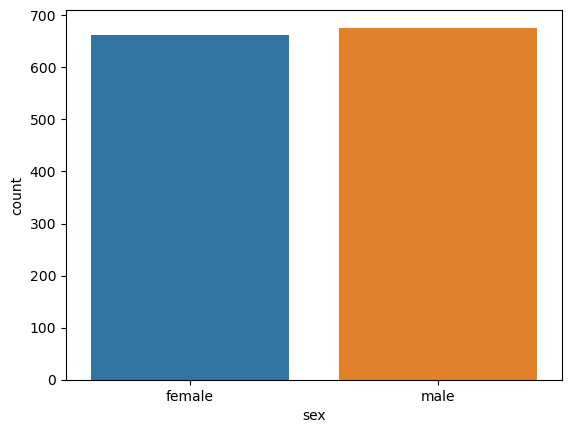

In [18]:
sns.countplot(x='sex', data=insurance_file)
plt.show()

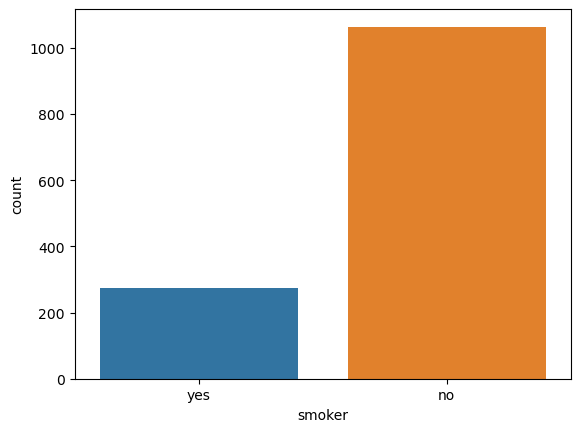

In [19]:
sns.countplot(x='smoker', data=insurance_file)
plt.show()

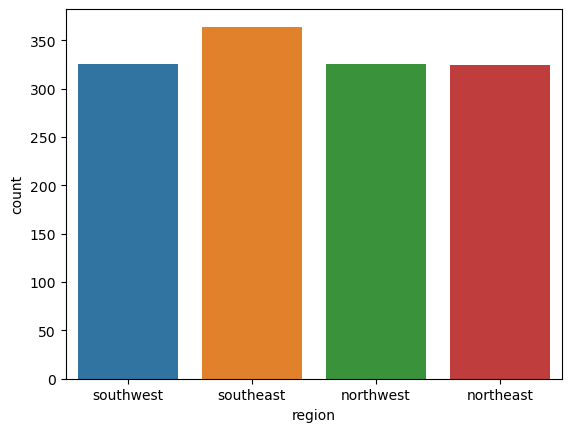

In [20]:
sns.countplot(x='region', data=insurance_file)
plt.show()

In [21]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()


In [22]:
insurance_file.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
insurance_file["smoker"] = label_encoder.fit_transform(insurance_file["smoker"])
insurance_file["sex"] = label_encoder.fit_transform(insurance_file["sex"])
insurance_file["region"] = label_encoder.fit_transform(insurance_file["region"])

In [24]:
insurance_file.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
insurance_file.corr()["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [26]:
insurance_file.corr()["charges"].sort_values(ascending=True)

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

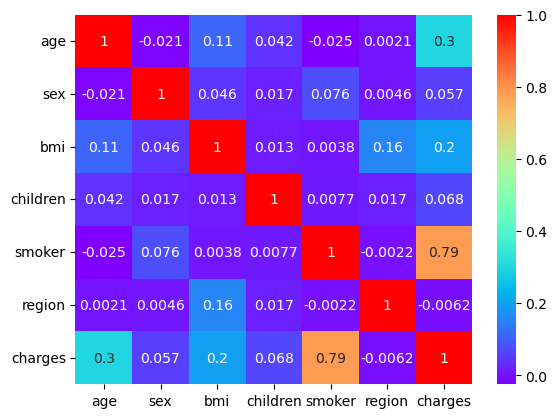

In [27]:
sns.heatmap(insurance_file.corr(),annot=True,cmap="rainbow")

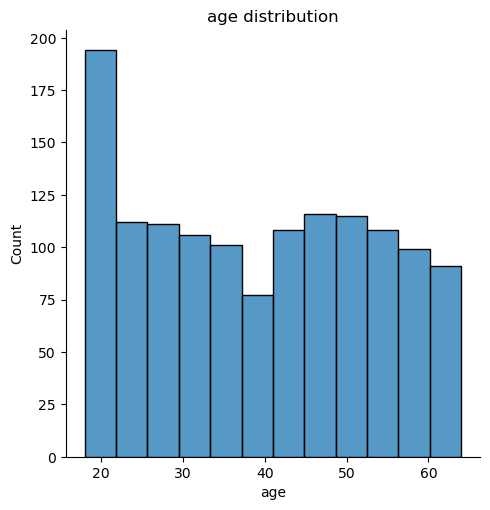

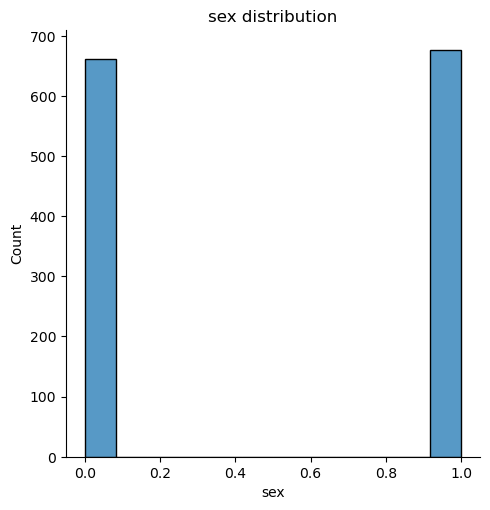

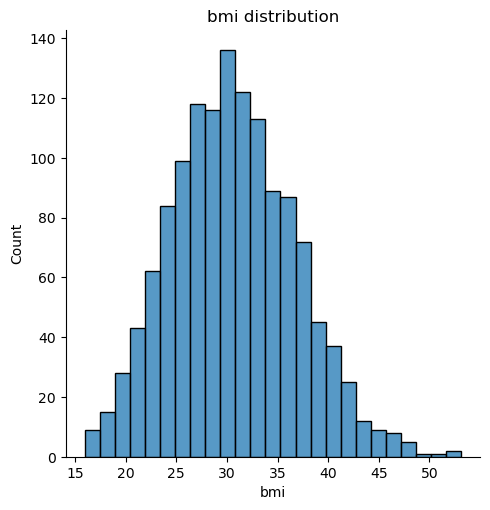

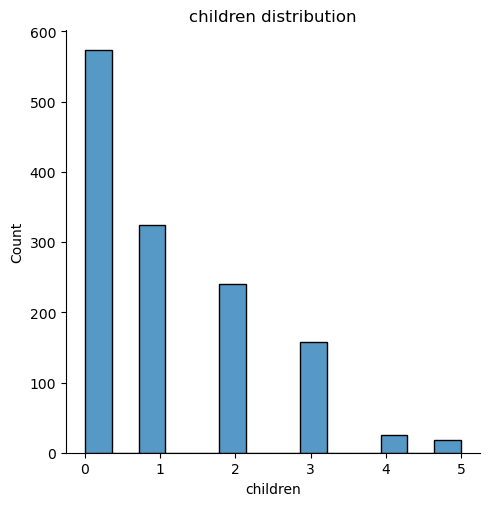

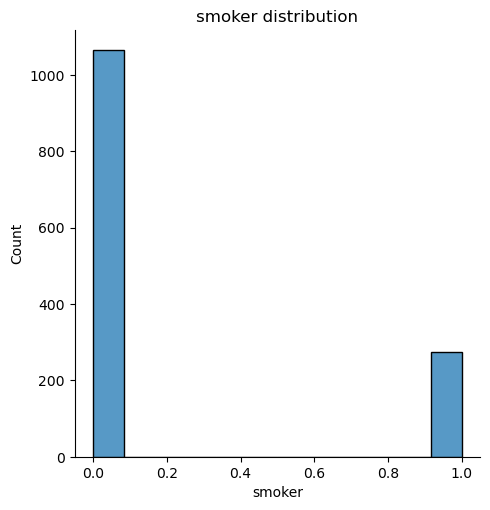

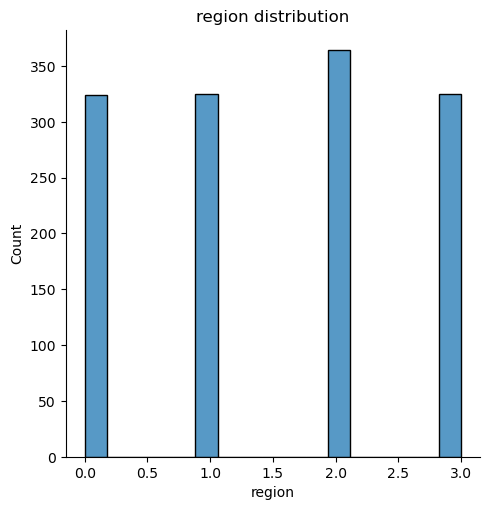

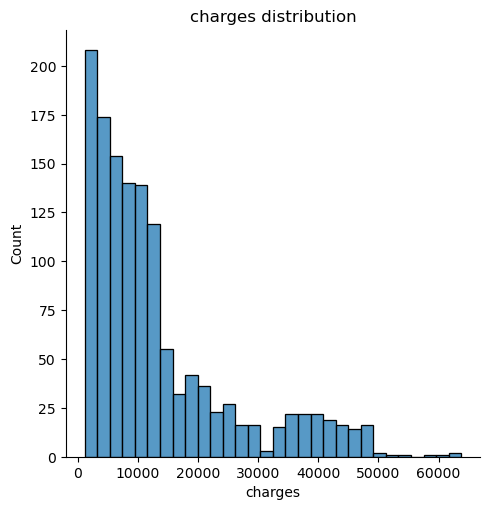

In [28]:
for i in insurance_file.columns:
    sns.displot(insurance_file[i])
    plt.title(i+" "+"distribution")

    plt.show()


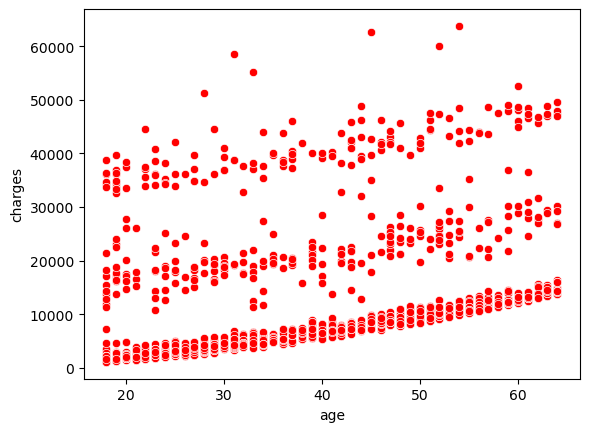

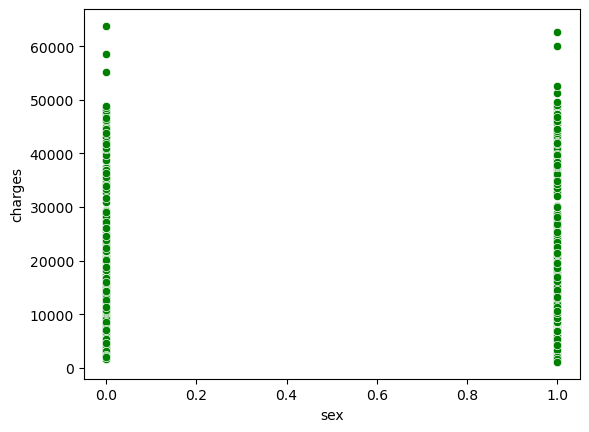

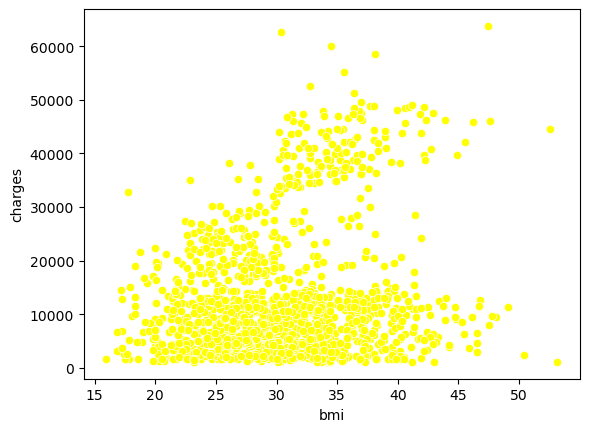

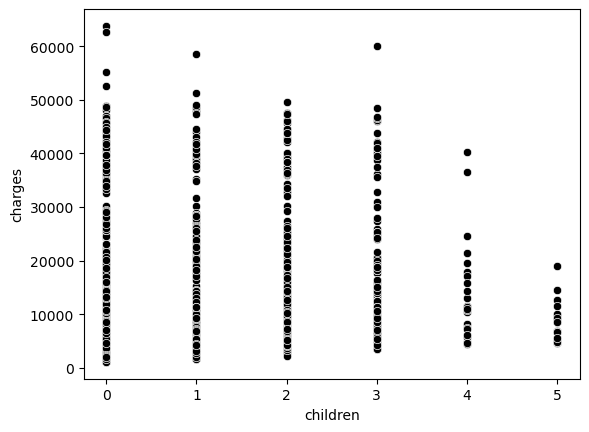

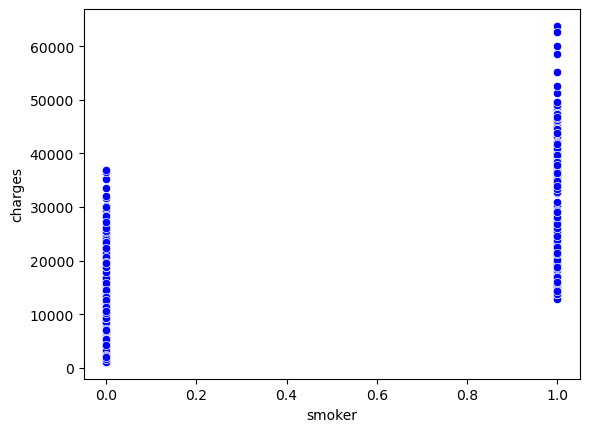

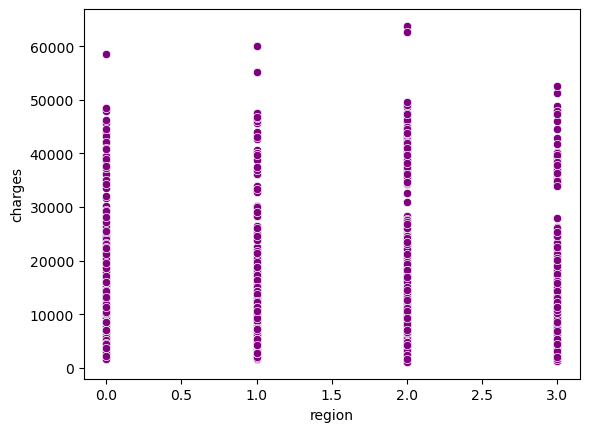

In [29]:
colorsforx=["red","green","yellow","black","blue","purple"]
colorchanger=0
for i in insurance_file.columns[:-1]:
    sns.scatterplot(data=insurance_file,x=i,y="charges",color=colorsforx[colorchanger])
    
    plt.show()
    colorchanger+=1


# Machine Learning

In [30]:
x=insurance_file[["age","sex","bmi","children","smoker","region"]]
y=insurance_file["charges"]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(x,y, test_size=0.30)

In [32]:
from sklearn.preprocessing import StandardScaler



In [33]:


# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
scaled_X_train = scaler.fit_transform(X_train)

# Transform your test data using the mean and standard deviation from the training data
scaled_X_test = scaler.transform(X_test)


In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def modelresults(predictions):
    print("mean absolute error on model is{}".format(mean_absolute_error(Y_test,predictions)))
    print("Root mean square error on model is{}".format(np.sqrt(mean_squared_error(Y_test,predictions))))
        
    

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(scaled_X_train,Y_train)

LinearRegression()

In [49]:
predslr=lr.predict(scaled_X_test)
modelresults(predslr)

mean absolute error on model is4299.505880480797
Root mean square error on model is6152.312597962984


In [50]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svrmodel = SVR()
param_gridsvr = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5]
}
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(scaled_X_train, Y_train)
print("Best parameters for model are: {}".format(gridsvr.best_params_))



Best parameters for model are: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [51]:
predsgridsvr=gridsvr.predict(scaled_X_test)
modelresults(predsgridsvr)

mean absolute error on model is7779.37832470117
Root mean square error on model is11947.237620655664


In [68]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svrmodel = SVR()
param_gridsvr = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5]
}
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(scaled_X_train, Y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [69]:
# Make predictions using the trained model
predsgridrfr = gridsvr.predict(scaled_X_test)

# Evaluate the model using the modelresults function
modelresults(predsgridrfr)


mean absolute error on model is7779.37832470117
Root mean square error on model is11947.237620655664


In [70]:
columniterate = 1
for index in x.columns:
    mean = insurance_file[index].mean()
    print("The mean of column {} is {}".format(columniterate, mean))
    columniterate += 1


The mean of column 1 is 39.20702541106129
The mean of column 2 is 0.5052316890881914
The mean of column 3 is 30.66339686098655
The mean of column 4 is 1.0949177877429
The mean of column 5 is 0.20478325859491778
The mean of column 6 is 1.515695067264574
